In [ ]:
#check GPU device
!nvidia-smi

Sun Jun  4 15:42:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/SLC_Project/datasets/500data

/content/drive/.shortcut-targets-by-id/1qwXu3FImYcrgP2McJlInlWLrHVHgUa3g/SLC_Project/datasets/500data


In [1]:
import os

In [2]:
train_path = 'C:/Users/tuana/SLC_PRO/500data_resized/train'

In [3]:
folders = os.listdir(train_path)

In [4]:
for f in folders:
  sub_path = os.path.join(train_path,f)
  print(sub_path)
  ims = [x for x in os.listdir(sub_path) if x.lower().endswith('.jpg')]
  print(len(ims))

C:/Users/tuana/SLC_PRO/500data_resized/train\0
500
C:/Users/tuana/SLC_PRO/500data_resized/train\1
500
C:/Users/tuana/SLC_PRO/500data_resized/train\2
500
C:/Users/tuana/SLC_PRO/500data_resized/train\3
500
C:/Users/tuana/SLC_PRO/500data_resized/train\4
500
C:/Users/tuana/SLC_PRO/500data_resized/train\5
500
C:/Users/tuana/SLC_PRO/500data_resized/train\6
500
C:/Users/tuana/SLC_PRO/500data_resized/train\7
500
C:/Users/tuana/SLC_PRO/500data_resized/train\8
500
C:/Users/tuana/SLC_PRO/500data_resized/train\9
500
C:/Users/tuana/SLC_PRO/500data_resized/train\a
500
C:/Users/tuana/SLC_PRO/500data_resized/train\b
500
C:/Users/tuana/SLC_PRO/500data_resized/train\bye
500
C:/Users/tuana/SLC_PRO/500data_resized/train\c
500
C:/Users/tuana/SLC_PRO/500data_resized/train\d
500
C:/Users/tuana/SLC_PRO/500data_resized/train\del
500
C:/Users/tuana/SLC_PRO/500data_resized/train\e
500
C:/Users/tuana/SLC_PRO/500data_resized/train\F
500
C:/Users/tuana/SLC_PRO/500data_resized/train\G
500
C:/Users/tuana/SLC_PRO/500d

In [ ]:
#!rm -rf /content/drive/MyDrive/SLC_Project/datasets/500data/alldata

In [ ]:
#!unzip -q alldata.zip

In [ ]:
#!unzip -q datasets.zip

In [5]:
import os
print(os.getcwd())


c:\Users\tuana\SLC_PRO


In [10]:
import torch #operated by facebook with a lot of library
import torch.nn as nn
#import tqdm
class Model(nn.Module):
    def __init__(self, num_classes = 10 ) :
        # super(AlexNet, self). __init__()
        super().__init__()
        self.conv_1 = nn.Sequential(
            nn.Conv2d(3,32,kernel_size = 3 , stride = 1, padding=1),
            nn.ReLU())
            # nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.conv_2 = nn.Sequential(
            nn.Conv2d(32,64,kernel_size=3, stride =1 , padding = 1),
            # nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.conv_3 = nn.Sequential(
            nn.Conv2d(64,64,kernel_size = 3, stride =1 , padding = 1),
            # nn.BatchNorm2d(384), 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.conv_4 = nn.Sequential(
            nn.Conv2d(64,128,kernel_size = 3 , stride = 1, padding =1),
            # nn.BatchNorm2d(384),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride =2 ))
        self.flatten = nn.Flatten()
        self.fc1 =nn. Sequential( 
            nn.Linear(8192,526),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.fc2 = nn.Sequential(
            nn.Linear(526,128),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.fc3= nn.Sequential(
            nn.Linear(128, num_classes))
        
    def forward(self,x):
            out = self.conv_1(x)
            out = self.conv_2(out)
            out = self.conv_3(out)
            out = self.conv_4(out)
            out = self.flatten(out)
            # out = out.reshape(out.size(0), -1 )#flatten
            out = self.fc1(out)
            out = self.fc2 (out)
            out = self.fc3(out)
            #out = nn.Softmax(out)
            return out
def unit_test(b,c,h,w):
    model = Model(num_classes = 27)
    im_input = torch.randn((b,c,w,h))
    out = model(im_input)
    print(f'chick qua qua')
    return out

In [11]:
import torch
model = Model(num_classes = 51)

In [12]:
model

Model(
  (conv_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Sequential(
    (0): Linear(in_features=8192, out_features=526, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc2): Sequential(
    (0): Linear(in_features=526, out_features=128, bias

In [14]:
#create dataloader
from torchvision import transforms, datasets

train_transform = transforms.Compose((
    transforms.Resize(64),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),)
)
data_transform = transforms.Compose((
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456 , 0.406],
                         std =[0.229, 0.224, 0.225],)
))

# Intinialize dataset based-on folder path
train_dataset = datasets.ImageFolder(root='C:/Users/tuana/SLC_PRO/500data_resized/train', transform = train_transform)
# BTVN
val_dataset = datasets.ImageFolder(root = 'C:/Users/tuana/SLC_PRO/500data_resized/val', transform = data_transform) #note val doesn't need RandomHorizontalFlip

# Dataloader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
# BTVN
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = 64, num_workers = 2)


In [15]:
# Setting device for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [16]:
model = model.to(device)

In [17]:
# Choose Loss function and Optimizer
import torch.nn as nn
# from torch.optim import optim
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

In [18]:
save_best_model = 'C:/Users/tuana/SLC_PRO/Weights/best.pth'
os.makedirs(save_best_model,exist_ok=True)

In [19]:
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim

# Evaluation metrics
def accuracy(out, labels):
  _, pred = torch.max(out, dim=1)
  return torch.sum(pred==labels).item()
def train(model, num_epochs, optimizer, criterion, train_loader, val_loader, save_path):
    # Setting device for training
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)
  # train the model for 10 epochs
  best_acc = 0.0
  for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        # move the data to the device (GPU or CPU)
        data, target = data.to(device), target.to(device)

        # zero the gradients
        optimizer.zero_grad()

        # forward pass
        output = model(data)

        # calculate the loss
        loss = criterion(output, target)

        # backward pass
        loss.backward()
        optimizer.step()

        # calculate training accuracy and loss
        train_loss += loss.item() * data.size(0)
        _, predicted = output.max(1)
        train_correct += predicted.eq(target).sum().item()
        print(f'train_loss {train_loss}')
        print(f'train_correct {train_correct}')


    # calculate average training accuracy and loss for the epoch
    train_loss /= len(train_loader.dataset)
    train_acc = train_correct / len(train_loader.dataset)
    print(f'train_loss {train_loss}')
    print(f'train_acc {train_acc}')
    # evaluate the model on the test set
    model.eval()
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(val_loader):
            # move the data to the device (GPU or CPU)
            data, target = data.cuda(), target.cuda()

            # forward pass
            output = model(data)

            # calculate the loss
            loss = criterion(output, target)

            # calculate test accuracy and loss
            test_loss += loss.item() * data.size(0)
            _, predicted = output.max(1)
            test_correct += predicted.eq(target).sum().item()

    # calculate average test accuracy and loss for the epoch
    test_loss /= len(val_loader.dataset)
    test_acc = test_correct / len(val_loader.dataset)
    if test_acc > best_acc:
      best_acc = test_acc
      torch.save(model.state_dict(), save_path)
    # print the results for the epoch
    print('Epoch {}/{}: Train Loss: {:.6f}, Train Acc: {:.6f}, Test Loss: {:.6f}, Test Acc: {:.6f}'.format(
        epoch+1, num_epochs, train_loss, train_acc, test_loss, test_acc))



In [20]:
save_best_model = '/content/drive/MyDrive/SLC_Project/weights/best.pth'

# train my model
x = train(model = model, num_epochs = 10, optimizer=optimizer, criterion=criterion, train_loader=train_loader, val_loader=val_loader, save_path=save_best_model)

train_loss 251.37034606933594
train_correct 3
train_loss 502.4737854003906
train_correct 5
train_loss 754.3697204589844
train_correct 7
train_loss 1006.523681640625
train_correct 9
train_loss 1258.8030090332031
train_correct 11
train_loss 1510.8497772216797
train_correct 11
train_loss 1762.8378295898438
train_correct 13
train_loss 2014.5082092285156
train_correct 13
train_loss 2266.4901428222656
train_correct 15
train_loss 2518.4615478515625
train_correct 15
train_loss 2769.4379119873047
train_correct 16
train_loss 3020.2643127441406
train_correct 18
train_loss 3271.600860595703
train_correct 21
train_loss 3523.6705474853516
train_correct 22
train_loss 3775.1038818359375
train_correct 24
train_loss 4026.074905395508
train_correct 25
train_loss 4277.450958251953
train_correct 30
train_loss 4529.610885620117
train_correct 30
train_loss 4781.427200317383
train_correct 31


KeyboardInterrupt: 

In [3]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
class VGG16(nn.Module):
    def __init__(self,num_classes=6):
        super(VGG16,self).__init__()
        self.layer1= nn.Sequential(
            nn.Conv2d(3,64, kernel_size = 3, stride =1 , padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64,64,kernel_size=3, stride =1, padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride =2 ))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64,128, kernel_size = 3, stride= 1 ,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128,128,kernel_size = 3, stride =1 , padding =1 ),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128,256,kernel_size = 3, stride =1 ,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256,256,kernel_size = 3,stride =1 , padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 =nn.Sequential(
            nn.Conv2d(256,256,kernel_size= 3 ,stride = 1,padding =1 ),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size =2, stride= 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256,512,kernel_size =3,stride =1, padding =1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512,512,kernel_size=3, stride =1 ,padding =1 ),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512,512,kernel_size = 3,stride =1, padding =1 ),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride =2 ))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512,512,kernel_size= 3, stride =1, padding =1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512,512,kernel_size=3, stride =1, padding =1 ),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512,512,kernel_size = 3, stride =1 , padding =1 ),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096) ,
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096,4096),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            nn.Linear(4096,num_classes))
    def forward(self,x):
        out= self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out= self.layer4(out)
        out= self.layer5(out)
        out = self.layer6(out)
        out= self.layer7(out)
        out=self.layer8(out)
        out=self.layer9(out)
        out=self.layer10(out)
        out=self.layer11(out)
        out=self.layer12(out)
        out=self.layer13(out)
        out= out.reshape(out.size(0),-1)
        out=self.fc(out)
        out= self.fc1(out)
        out= self.fc2(out)
        return out

# Inference

## Step 1: Initialize and load weight model

In [4]:
import torch
import os
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import cv2

def inference( model, weight_path, im_path, num_class):
  model = VGG16(num_classes = num_class)
  #intialize device
  # check if GPU is available
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model_statedict = torch.load(weight_path, map_location = 'cpu')
  #mapping statedict to model
  model.load_state_dict(model_statedict)
  #send model to device
  model = model.to(device)
  # set the model to evaluation mode
  model.eval()
  image = cv2.imread(image_path)
  image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # display the image
  plt.imshow(image_RGB)
  image_pil = Image.open(im_path)
  data_transform = transforms.Compose((
      transforms.Resize(64),
      transforms.ToTensor(),
      transforms.Normalize(mean = [0.485, 0.456 , 0.406],
                          std =[0.229, 0.224, 0.225],)
  ))
  # Apply the transformations and get the image as a tensor
  image_tensor = data_transform(image_pil)
  #change 3 dim to 4 dim before inference
  im = image_tensor.unsqueeze(0)
  # Pass the image through the model
  im = im.to(device)
  output = model(im)
  # apply softmax
  output_softmax = torch.softmax(output, dim=1)# because output shape is 1 , 27  which is by column and to calculate column, dim needs to be dim  = 1
  # print output
  print(output_softmax)
  top_k_probs, top_k_classes = torch.topk(output_softmax, k=2)
  print(f'top_k_probs : {top_k_probs} /ntop_k_classes : {top_k_classes}')

In [5]:
import torch
import os
import matplotlib.pyplot as plt

In [6]:
model = VGG16(num_classes = 6)

In [7]:
#intialize device
# check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = model.to(device)
#define weights path
weight_path = 'C:/Users/peter/Github/Chess-voice-recognition/weights/White_detection.pth'
#load weight path
model_statedict = torch.load(weight_path, map_location = 'cpu')
#mapping statedict to model
model.load_state_dict(model_statedict)
#send model to device
model = model.to(device)
# set the model to evaluation mode
model.eval()




C:\Users\peter\AppData\Local\Temp\ipykernel_3784\1926428952.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_statedict = torch.load(weight_path, map_location = 'cpu

VGG16(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

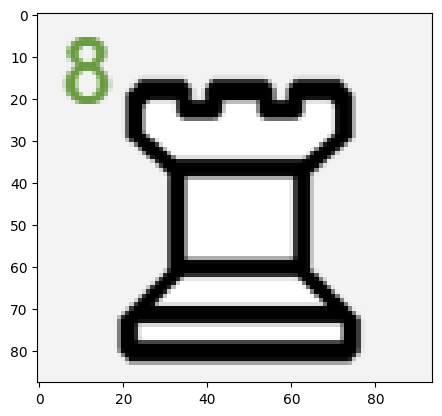

In [8]:
import cv2
# load the image
image = cv2.imread("C:/Users/peter/Github/Chess-voice-recognition/test_images/test5.png")
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# display the image
plt.imshow(image_RGB)

## Preprocessing image

In [9]:
from PIL import Image
import torchvision.transforms as transforms

In [10]:
im_path = 'C:/Users/peter/Github/Chess-voice-recognition/test_images/test5.png'
# Load the image using PIL
image_pil = Image.open(im_path)
if image_pil.mode != 'RGB':
    image = image_pil.convert('RGB')
    print("Image converted to RGB.")
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize with mean and std of ImageNet
                         std=[0.229, 0.224, 0.225])
])
# Apply the transformations and get the image as a tensor
image_tensor = transform(image)
#change 3 dim to 4 dim before inference
im = image_tensor.unsqueeze(0)
print(f'Image shape is : {im.shape}')
print(f'image size is : {image_pil.size} ')
# Pass the image through the model
im = im.to(device)
output = model(im)
# apply softmax
output_softmax = torch.softmax(output, dim=1)# because output shape is 1 , 27  which is by column and to calculate column, dim needs to be dim  = 1
# print output
print(f'output_softmax : {output_softmax}')
names = ['Black_bishop',
 'Black_king',
 'Black_knight',
 'Black_pawn',
 'Black_queen',
 'Black_rook']
top_k_probs, top_k_classes = torch.topk(output_softmax, k=1)
print(f'top_k_probs : {top_k_probs}')
print(f'top_k_classes : {top_k_classes}')
predicted_class = names[top_k_classes[0]]
predicted_class


Image converted to RGB.
Image shape is : torch.Size([1, 3, 224, 224])
image size is : (94, 88) 
output_softmax : tensor([[0.0330, 0.0321, 0.0792, 0.1545, 0.0252, 0.6760]],
       grad_fn=<SoftmaxBackward0>)
top_k_probs : tensor([[0.6760]], grad_fn=<TopkBackward0>)
top_k_classes : tensor([[5]])


'Black_rook'